# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>

## Numerical exercises 1

## - <span style="color:blue"> First:</span> the c++ codes are in the folder exercise_01 (remember to read the file READ_ME first)
## - <span style="color:blue"> Second:</span> run the following cells in order to do the data analysis

### ex1

Nella cartella ex1 è presente l'implementazione del codice relativo all'esercizio 01.1  
utilizzando il generatore Rannyu() (Random New York University) vengono generati in modo uniforme M valori di r nell'intervallo (0,1].  
Successivamente ho diviso in blocchi (N) il mio set di M valori. Per ogni blocco ho calcolato la media dei valori di r, ottenendo quindi una misura di $ <r> $ per ciascun blocco.    
Ho implementato poi una funzione *data blocking* che prende come argomento le N misure relative ai blocchi e ne calcola l'errore (deviazione standard della media) in modo successivo. Ovvero:
- per il primo blocco non c'è errore (ho fatto solo una misura)
- faccio una seconda misura (quindi guardo anche il secondo blocco) e allora calcolo la media e l'errore tra loro
- faccio un'ulteriore misura, ricalcolo la media e l'errore considerando anche questa nuova misura
- ect..
  
Lo stesso procedimento è stato eseguito anche per calcolare la varianza per la seconda parte dell'esercizio.  
I grafici ottenuti sono stati traslati in 0 sull'asse delle y.  
  
Come si può notare dai risultati ottenuti la generazione di numeri casuali ha permesso il calcolo del valor medio e della varianza di una variabile random distribuita in modo uniforme. Quello che è stato fatto concretamente è stato risolvere quantitativamente un integrale.

### Exercise 01.1 
- Test the Pseudo-Random Number generator downloaded from the NSL Ariel web site by estimating:

1. $\langle r \rangle = \int_0^1 r dr = 1/2$. <font color="red">Make a picture of the estimation of $\langle r \rangle$ and its uncertainty (which corresponds to Standard Deviation of the mean for the estimation of $\langle r \rangle$) with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font> (see below: Computing statistical uncertainties).

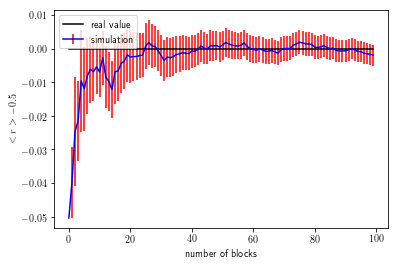

In [37]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
matplotlib.rcParams['text.usetex'] = True #per usare latex in python

M=10000
N=100
L=int(M/N)
x = np.arange(N)
#x*=L if want to plot in function of the total number of throwns
y = np.zeros(N)
sum_prog,err_prog = np.loadtxt("datir.txt",usecols=(0,1), delimiter=' ', unpack='true')
plt.errorbar(x,sum_prog,yerr=err_prog,color='b',ecolor='r')
plt.ylabel(r"$<r>-0.5$")
#plt.xlabel("throwns")
plt.xlabel("number of blocks")
plt.plot(x,y,color='black')
plt.legend(["real value","simulation"])

plt.show()

2. $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$. <font color="red">Make a picture of the estimation of $\sigma^2$ and its uncertainty (which corresponds to Standard Deviation of the mean for the estimation of $\langle (r-1/2)^2 \rangle$) with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font> (see below: Computing statistical uncertainties).

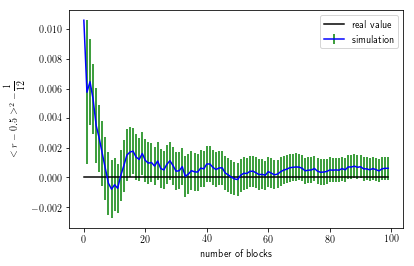

In [38]:
# Continue using variables and functions of the previous code cell
sum_prog = np.zeros(N)
err_prog = np.zeros(N)
    
sum_prog,err_prog = np.loadtxt("datisigma.txt",usecols=(0,1), delimiter=' ', unpack='true')
plt.errorbar(x,sum_prog,yerr=err_prog, color ='b' , ecolor='g')
plt.ylabel(r'$< r-0.5 > ^2 - \displaystyle\frac{1}{12} $')
#plt.xlabel("throwns")
plt.xlabel("number of blocks")
plt.plot(x,y,color='black')
plt.legend(["real value","simulation"])

plt.show()

#### COMMENTO
  
Come in un vero esperimento gli errori relativi ai primi valori medi sono più grandi rispetto agli errori sul valore finale trovato. Si può anche notare come, con il metodo blocking, gli errori ottenuti dopo una certo numero di blocchi rimangano della stessa grandezza, senza andare a $0$. Questo riflette ancora di più la natura di un esperimento fisico per cui si ha sempre incertezza sulla misura di una certa quantità.  

#### 01.1.3
La terza parte del primo esercizio richiede il calcolo del test del **chiquadro**.  
Per fare questo esercizio ho diviso in M parti l'intervallo [0,1]. Successivamente per $nsteps = 100$ ho generato ad ogni step $10^4$ numeri casuali distribuiti uniformemente tra [0,1] e ho riempito un istrogramma di conteggi. Ho implementato una funzione che prende come argomento l'istogramma e nel calcola il chiquadro rispetto al valore di aspettazione ($\frac{n}{M}$).  
Come si può osservare dal grafico ottenuto il chiquadro oscilla intorno al valore atteso $100$, con variazione pari a circa $20$ in valore assoluto.  
Il test del chi quadro serve per capire se effettivamente stiamo generando numeri casuali distribuiti in modo uniforme, oppure se stiamo utilizzando un dado non equilibrato. Per cui se il singolo valore del chiquadro è molto grande significa che il nostro dado è truccato, se invece il valore del chiquadro è piccolo allora significa che stiamo usando un buon dado.  Ovviamente il valore del chi-quadro dipende anche dal numero di sotto intervalli che sto considerando. Più è grande il numero di bin allora più il valore del chiquadro aumenta, poichè sto considernado molti più gradi di libertà. (si può dimostrare che il valore di aspettazione di un buon chiquadro è pari proprio ai gradi di libertà del sistema, infatti spesso non si calcola il chiquadro ma il $\textit{chiquadro-ridotto}=\dfrac{chiquadro}{gradi di libertà}$ )
  
Nel nostro caso i gradi di libertà sono pari al numero di bin. La nostra ipotesi è che il generatore di numeri casuali sia un genetore con distribuzione di probabilità uniforme. Il chi quadro inoltre vale mediamente $100$. Per capire se la nostra ipotesi è corretta andiamo ad osservare la tabella del chiquadro.  
<img src="chi-square-table.png" width="600">  


Il chiquadro è $ > 82.358$ ma $<118.498$. Per cui la probabilità che la nostra ipotesi sia vera è del $90\%$, cioè si può concludere che la differenza tra i bin è statisticamente significativa al livello di probabilità $90\%$. Il nostro generatore di numeri casuali con probabilità uniforme è molto buono e non dà preferenza a intervalli precisi in $[0,1]$.  
**nota** ho fatto un test anche utilizzando il *chiquadro-ridotto*. Per capire se una ipotesi assunta inizialmente (nel nostro caso che i numeri generati siano distribuiti in modo uniforme) sia corretta viene calcolata la probabilità di ottenere un $chiquadro \geq mio\_chiquadro$ come $P(\chi^2 \geq my\_\chi^2) = \dfrac{2}{2^{\frac{d}{2}} \Gamma (\frac{d}{2}) }\int_{my\_\chi^2}^{\infty} dx x^{d-1} e^{\frac{-x^2}{2}}$, con $d=$numero gradi di libertà. Risolvendo questo integrale usando $\texttt{Mathematica}$ nel nostro caso specifico si ottiene sempre 1, cioè la nostra ipotesi di generatore uniforme è corretta.  

3. Divide $[0,1]$ into $M$ identical sub-intervals and implement the $\chi^2$ test. Obviously, the number of expected events observed in each sub-interval after $n$ *throws*, according to a uniform distribution, is $np = n\times 1/M= n/M$. Fix $M=10^2$ and use for $n$ the first $10^4$ pseudo-random numbers, then the successive $10^4$ pseudo-random numbers, and so on ... 100 times. <font color="red">Plot $\chi^2_j$ for $j=1, ..., 100$</font>. In this case the chi-square statistic is:
$$\chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M}$$
We should expect on average that $(n_i - n/M)^2 \simeq n/M$ and thus $\chi^2 \simeq 100$, i.e. the number of sub-intervals.
A larger value of $\chi^2$ indicates that the hypothesis ($n_i$ are drawn from a uniform distribution) is rather unlikely.

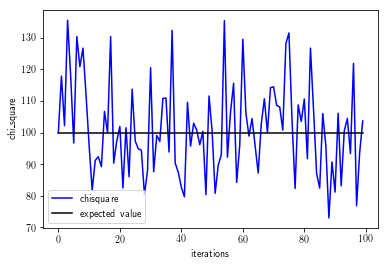

In [39]:
y = np.full(N,100.)
z = np.arange(100)
chi = np.loadtxt("chiquadro.txt",unpack='true')
plt.plot(z,chi,color='b')
plt.ylabel("chi\_square")
plt.xlabel("iterations")
plt.plot(z,y,color='black')
plt.legend(["chisquare","expected value"])

plt.show()

### Exercise 01.2
- Extend Pseudo-Random Number generator downloaded from the NSL Ariel web site and check the Central Limit Theorem:

### ex2
Nella cartella ex2 è presente l'implementazione del codice relativo alla seconda parte dell'esercitazione.  
In questa seconda parte quello che abbiamo fatto è muoversi nello spazio funzionale delle funzioni di distribuzione di probabilità. In che modo? Sommando tra loro variabili distribuite secondo una certa distribuzione e osservando come sono distruibuite queste somme parziali. Tutto questo per constatare l'esistenza di due bacini di attrazione per le distribuzioni di probabilità (in realtà ci sono infiniti bacini, ma noi ne abbiamo osservati due).  
Come mostra la consegna vengono eseguite $10^4$ realizzazioni di $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ (per $N=1, 2, 10, 100$). Le singole $x_i$ sono stati generate con:  
- distribuzione uniforme (Random New York University)
- distribuzione esponenziale (implementata usando metodo di trasformazione)
- distribuzione lorenziana (come sopra)

Come mostrano i risultati i due bacini di attrazione sono la *distribuzione gaussiana* e la *distribuzione lorenziana*. Che la distribuzione gaussiana fosse un bacino di attrazione lo sapevamo già dal teorema del limite centrale, che proprio in questo esercizio abbiamo constatato essere vero per lo standard e exponential dice.  
Ma il TLC non vale per variabili random distribuite secondo una distribuzione il cui momento centrale secondo (la varianza) sia non limitata --> *lorentzian dice*.  

Per verificare che la distribuzione sia effettivamente gaussiana nel primo caso e lorenziana nel secondo ho fittato con tali funzioni gli istrogrammi ottenuti

2. <font color="red">Make 3 pictures</font> with the histograms obtained filling them with $10^4$ realizations of $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ (for $N=1, 2, 10, 100$), being $x_i$ a random variable sampled throwing a *standard* dice (fig.1), an *exponential* dice (fig.2, use $\lambda=1$) and a *Lorentzian* dice (fig.3, use $\mu=0$ and $\Gamma=1$).

Note tha you can try to fit the case $N=100$ with a Gaussian for standard and exponential dices, whereas you should use a Cauchy-Lorentz distribution for the last case.

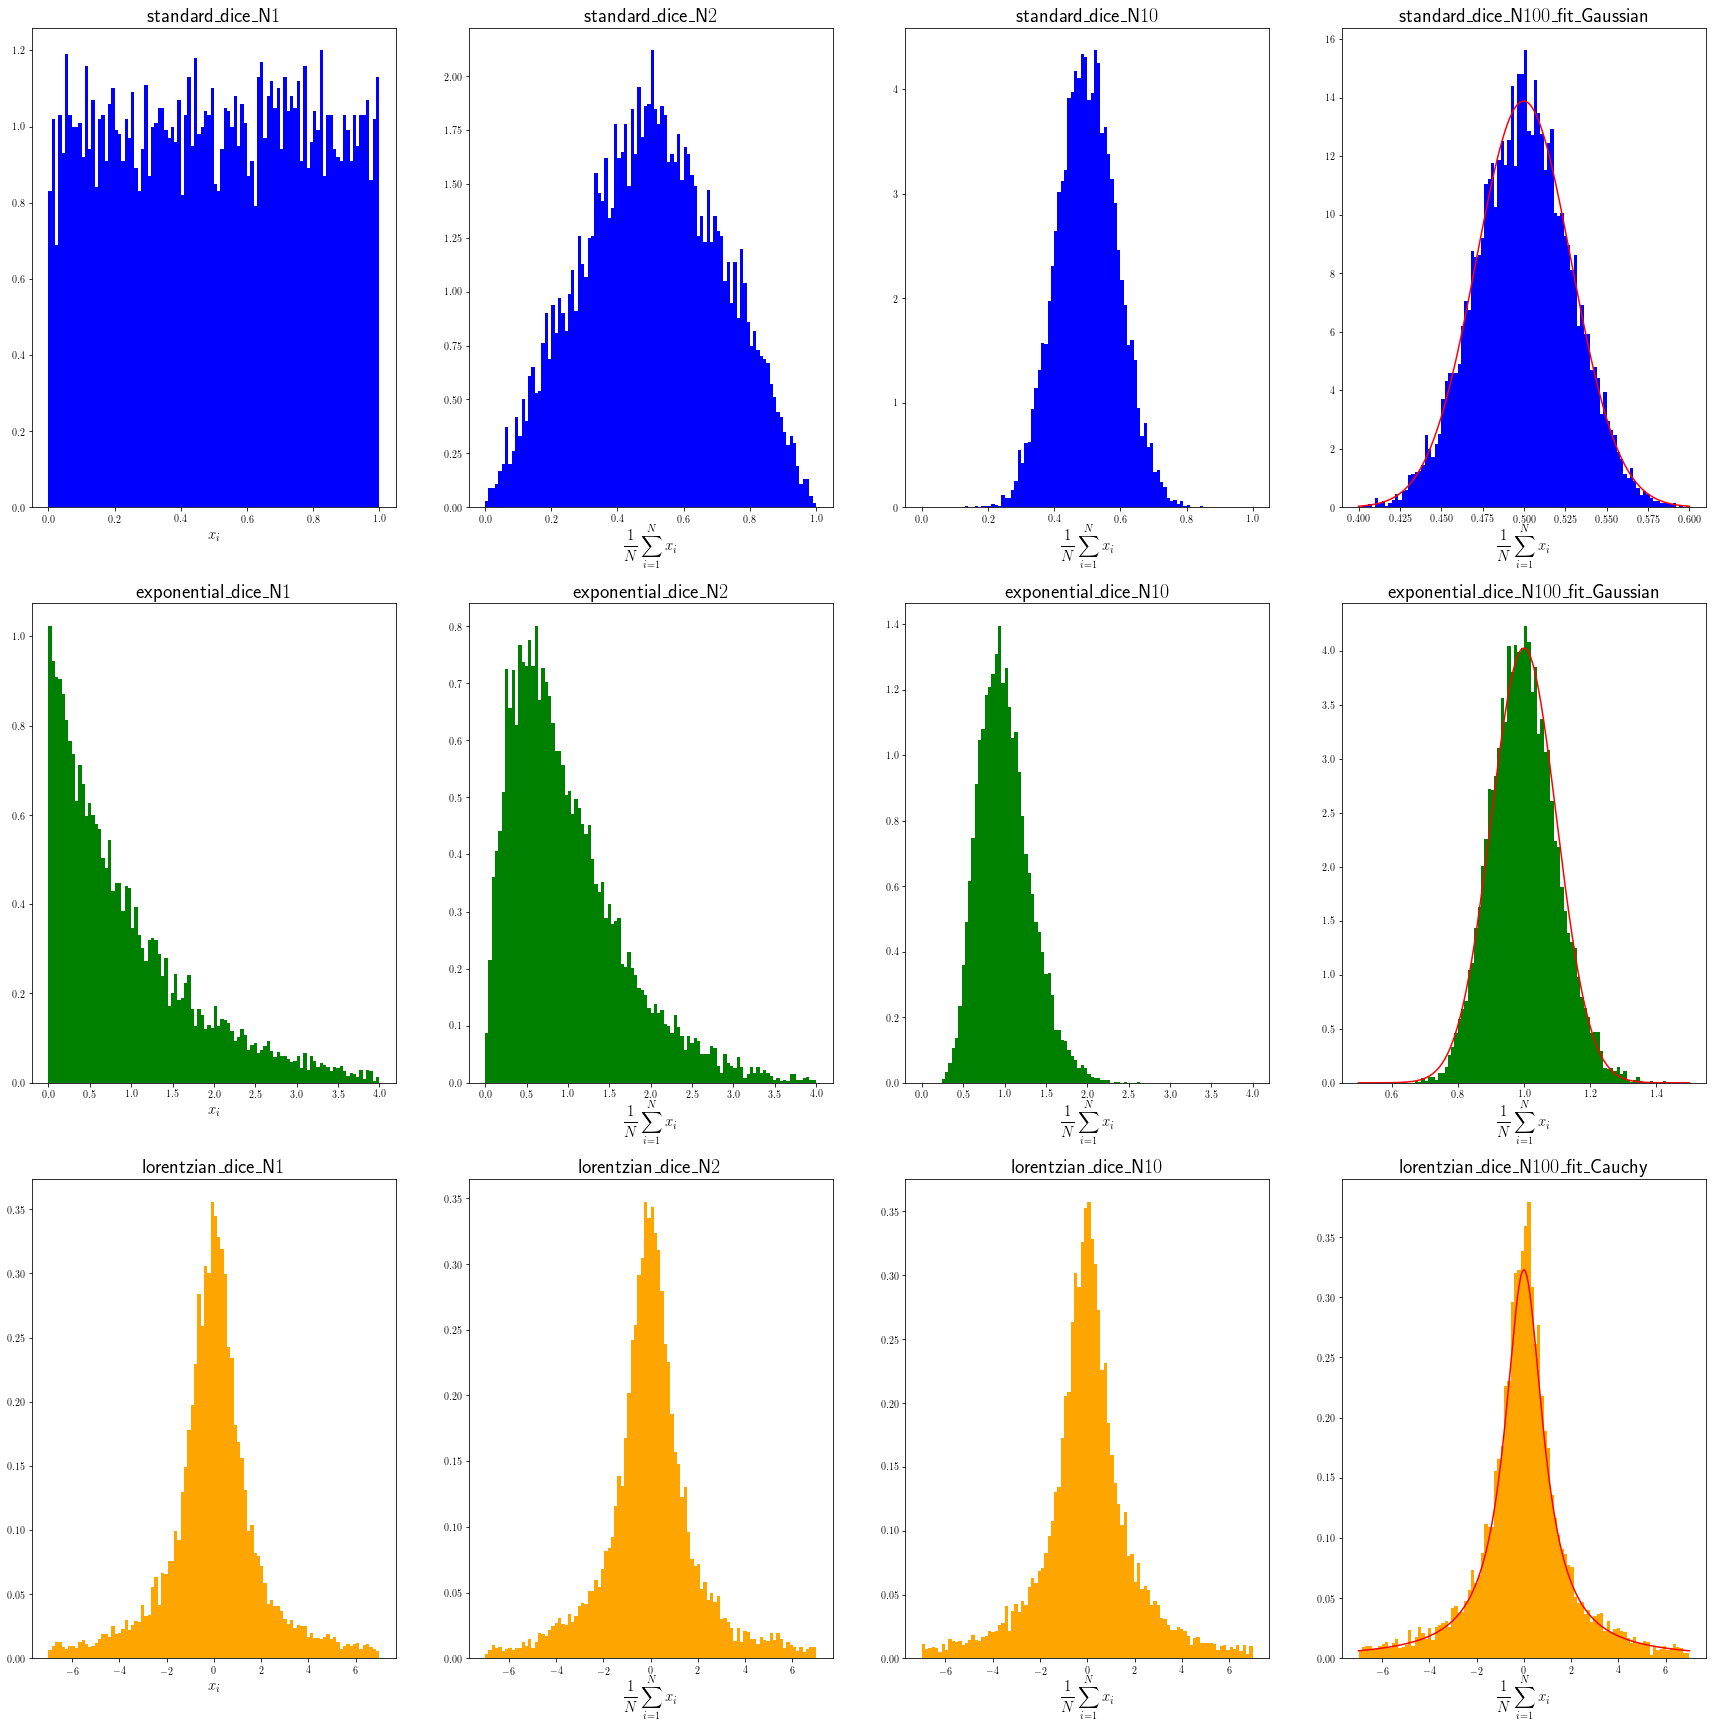

In [40]:
from scipy import stats

n_bins=100
N=r'$1$',r'$2$',r'$10$',r'$100$'
hist = 'hist_stand','hist_exp','hist_lor'
title = 'standard\_dice\_N','exponential\_dice\_N','lorentzian\_dice\_N'
title_fit = '\_fit\_Gaussian','\_fit\_Gaussian','\_fit\_Cauchy'
Range = (0.,1.),(0.,4.),(-7.,7.)
Range_fit = (0.4,0.6),(0.5,1.5),(-7.,7.)
ax_label = r'$\displaystyle\frac{1}{N}\sum_{i=1}^{N} x_i$'
Color = 'blue','green','orange'

fig,axs = plt.subplots(nrows=3,ncols=4,figsize=(30, 30))

for i in range(3):
    for j in range(4):
        y = np.loadtxt(hist[i]+".txt",usecols=(j),unpack='true')
        if ( ((i==0) or (i==1) or (i==2)) & (j==3) ):
            axs[i][j].hist(y, n_bins ,density=True,facecolor=Color[i],range=Range_fit[i])
            axs[i][j].set_title(title[i]+N[j]+title_fit[i],fontsize=20)
            xmin,xmax = min(Range_fit[i]),max(Range_fit[i])
            lnspc = np.linspace(xmin,xmax,len(y))
            if(i==2):
                m, s = stats.cauchy.fit(y)
                pdf_g = stats.cauchy.pdf(lnspc,m,s)
            else:
                m, s = stats.norm.fit(y)
                pdf_g = stats.norm.pdf(lnspc,m,s)
            axs[i][j].plot(lnspc,pdf_g,color='red')
        else:
            axs[i][j].hist(y, n_bins,density=True,facecolor=Color[i],range=Range[i])
            axs[i][j].set_title(title[i]+N[j],fontsize=20)
        if(j==0):
            axs[i][j].set_xlabel('$x_i$',fontsize=15, color='black')
        else:
            axs[i][j].set_xlabel(ax_label,fontsize=15, color='black')
            
plt.show()

### Exercise 01.3
- **Simulate** the Buffon’s experiment (see LSN_Lecture_00, supplementary material):  A needle of length $L$ is thrown at random onto a horizontal plane ruled with straight lines a distance $d$ (must be $d > L$, but do not use $d\gg L$ otherwise $P\ll 1$) apart. The probability $P$ that the needle will intersect one of these lines is: $P = 2L/\pi d$. This could be used to evaluate $\pi$ from throws of the needle: if the needle is thrown down $N_{thr}$ times and is observed to land on a line $N_{hit}$ of those times, we can make an estimate of $\pi$ from
$$\pi = \frac{2L}{Pd} = \lim_{N_{thr} \to \infty}\frac{2LN_{thr}}{N_{hit}d}$$
<font color="red">Make a picture of the estimation of $\pi$ and its uncertainty (Standard Deviation of the mean) with a large number of *throws* $M$ as a function of the number of blocks, $N$</font> (see below: Computing statistical uncertainties). If possible, do not use $\pi$ to evaluate $\pi$.

### ex3

Nella cartella ex3 è presenta l'implementazione del codice relativo alla terza parte dell'esercitazione.  
Per questa terza parte è stato necessario implementare l'esperimento di Buffon.  
Per prima cosa occorre notare alcune invarianze (scelto un sistema di riferimeto adatto, asse x orizzontale e asse y verticale. La direzione delle *straight line* è quella orizzontale):  
- invarianza traslazionale lungo x, per cui occorre principalmente guardare la direzione verticale
- invariaza rotazionale dx e sx, ovvero non è necessario generare un angolo per la direzione dello stuzzicadente in tutto l'intervallo $[0,2\pi]$, basta generarlo in metà cerchio, in $[\frac{-\pi}{2},\frac{\pi}{2}]$
- condizione periodica lungo y: basta generare un punto tra 0 e la distanza tra le *straight line*
  
Infine l'ultimo accorgimento è per la generazione dell'angolo. Buffon ha eseguito l'esperimento per calcolare proprio il valore di $\pi$, per cui non sarebbe corretto usare questo valore per eseguire la simulazione. Per generare tale angolo ho utilizzato la funzione arcoseno:   
- genero due punto all'interno del cerchio unitario
- $theta = \arcsin (\dfrac{y}{ \sqrt{y^2+x^2} })$
  
L'analisi dati è stata eseguita utilizzando il metodo blocking implementato nella funzione già citata in precedenza. Di seguito sono mostrati i risultati dei lanci. Il valore trovato tende a $\pi$. (i grafici sono traslati in 0 sull'asse y)

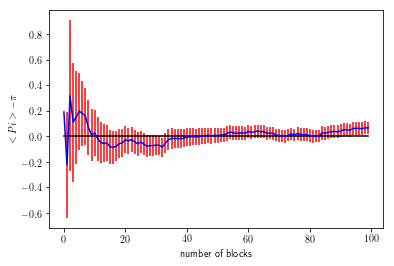

In [41]:
N=100
y = np.zeros(N)
sum_prog,err_prog = np.loadtxt("datipi.txt",usecols=(0,1), delimiter=' ', unpack='true')
plt.errorbar(x,sum_prog,yerr=err_prog,color='b',ecolor='r')
plt.ylabel(r"$<Pi>-\pi$")
#plt.xlabel("throwns")
plt.xlabel("number of blocks")
plt.plot(x,y,color='black')

plt.show()

- <font color="blue">In a Monte Carlo calculation, you can use the arguments above to outputting an estimate of A and its statistical uncertainty on the fly, during your calculation. You will be able to do this every $M/N$ steps, and thus, in the end, $N$ times</font>. Note that after the first $M/N$ Monte Carlo steps, at the end of the first block, your estimation of the uncertainty is not computable, so set it to zero and compute it only from the second block. **Question**: $N$ can be chosen in many ways ... what are the limitations regarding this choice?

- <font color="blue">answer</font> : you cannot choose N equal to 1, because you have not uncertainty, because it corresponds to have just one measure.
- you can also thinks to use N=M, but in this case all the points have to be taken into account and it is in disagreement with our use of data blocking numerical sampling.
- it's not possible to choose N bigger than M, it doesn't have any sense. 
- if we want to use the data blocking method we need that the points present in one block are uncorreleted with the points in all the others blocks. So it's important to choose N keeping in mind this hypothesis. 

Utilizzando il metodo blocking la scelta cade sul valore di N, cioè su quanti blocchi dividere la nostra simulazione. Ciò concretamente significa quanti esperimenti fare, poichè un valore misurato coincide con un valore estrapolato da un singolo blocco.  
Ma quanto devono essere grandi i blocchi? Nel momento in cui si effettua una misura questa deve essere scorrelata dalla misura eseguita precedentemente. Ciò significa che la grandezza dei blocchi dipende dalla lunghezza di correlazione dei valori random che vengono generati. Le singole valutazioni all'interno di uno specifico blocco devono essere scorrelate dalle valutazioni presenti in un altro blocco. 